---
---

# Uncovering Behavioral Patterns in Social Anxiety Using Clustering and PCA

---
---

<div class="alert alert-block alert-warning">
Adapt the headline in the cell above!
</div>

<div class="alert alert-block alert-warning">

Present a short summary of the pitch!

(Add up to 5 bullet points in the cell below)
</div>

* Rising social anxiety among students is often undetected until symptoms escalate.
* We use PCA and clustering to uncover behavioral risk profiles from survey data.
* The data includes lifestyle, health, and mental history factors from 10,000+ students.
* The approach is scalable, cost-effective, and based on existing anonymized survey data.
* Insights can support early interventions and better resource allocation in student services.


# Imports and Settings
---
<div class="alert alert-block alert-warning">
Use the following code cell to organize all imports and global settings.
Do not remove the pandas option.
    
(Commented code, in the next cell)
</div>

In [1]:
import pandas as pd
# make pandas display ALL columns of a dataframe
pd.options.display.max_columns = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pca import pca
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import OPTICS
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram

In [2]:
#suppress all warnings to keep outputs clean
import warnings
warnings.filterwarnings('ignore')


# Task 1 -- The Data

<div class="alert alert-block alert-warning">
Present the origin of the dataset, including e.g.
    
* the source where you got it from (link to the repository),
* the author(s),
* the license,
* the purpose for which it was collected!

(Add bullet points in the cell below)
</div>

* **Source**: [Kaggle – Social Anxiety Dataset by natezhang123](https://www.kaggle.com/datasets/natezhang123/social-anxiety-dataset)
* **Author**: Liam Henderson, Ethan Callahan, Charlotte Fraser
* **License**: CC0: Public Domain
* **Purpose**: Collected for educational and research use, to support mental health analysis, machine learning models for anxiety detection, and behavioral insight generation.


## The Raw Data
<div class="alert alert-block alert-warning"> 

Load the data and present a couple of samples. Call the dataset variable __raw_data__.

(Commented code, add cells below)
</div>


In [3]:
#load dataset into a pandas dataframe
raw_data = pd.read_csv("enhanced_anxiety_dataset.csv")

#present the first 5 rows of the dataset
raw_data.head(5)

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


<div class="alert alert-block alert-warning"> 
Explain the dataset with all its features.
    
* The features should be described in the following table. The range is the set of possible values that a feature can take, e.g. "red, green, blue", "$\mathbb{R}$", "$1,2,...,12$".
* You may describe each feature individually or groups of features, if many features are similar (whatever is easier to explain.)

(Fill in the table, add bullet points in the next cell)
</div>

| Feature                        | Range                            | Explanation |
|-------------------------------|----------------------------------|-------------|
| Age                           | 18–64                             | Age of the individual |
| Gender                        | male, female, other              | Self-identified gender |
| Occupation                    | categorical                      | Professional field or employment status |
| Sleep Hours                   | $\mathbb{R}$                     | Average hours of sleep per night |
| Physical Activity (hrs/week)  | $\mathbb{R}$                     | Weekly amount of physical exercise |
| Diet Quality                  | 1–10                              | Self-rated dietary habits from poor (1) to excellent (10) |
| Alcohol Consumption           | $\mathbb{N}_0$ (drinks/week)      | Weekly number of alcoholic beverages consumed |
| Caffeine Intake               | $\mathbb{N}_0$ (mg/day)           | Daily caffeine consumption in milligrams |
| Smoking                       | yes, no                           | Indicates if the person currently smokes |
| Heart Rate                    | $\mathbb{N}$ (bpm)                | Average resting heart rate |
| Breathing Rate                | $\mathbb{N}$ (breaths/min)        | Average resting breathing rate |
| Stress Level                  | 1–10                              | Self-rated stress from low (1) to high (10) |
| Sweating Level                | 1–5                               | Self-rated tendency to sweat |
| Dizziness                     | yes, no                           | Indicates whether dizziness is experienced |
| Family History of Anxiety     | yes, no                           | Indicates whether anxiety runs in the family |
| Medication                    | yes, no                           | Indicates if currently on mental health medication |
| Therapy Sessions (per month)  | 0–30                              | Number of therapy sessions attended monthly |
| Major Life Event              | yes, no                           | Indicates recent major life change |
| Anxiety Level                 | 1–10                              | Self-rated social anxiety (used only for validation) |


* The dataset contains over 10,000 anonymized entries related to behavioral and psychological factors influencing social anxiety.
* 19 Features are grouped into categories: demographics, lifestyle habits, physiological indicators, mental health history, and recent life events.
* Feature ranges include:
  - Continuous values (e.g., sleep hours, heart rate)
  - Ordinal ratings (e.g., stress level, diet quality)
  - Binary indicators (e.g., medication use, recent life event)
  - Categorical variables (e.g., gender, occupation)
* The dataset also includes a target variable: self-reported `Anxiety Level` score on a 1–10 scale.

<div class="alert alert-block alert-warning">
Explain why the dataset is suitable for the pitched task!
    
(Add up 3 bullet points in the cell below)
</div>

* The dataset captures behavioral, lifestyle, and mental health-related features that universities could realistically monitor to identify students at risk of social anxiety.
* It includes primarily numeric and ordinal features, making it ideal for unsupervised learning methods like PCA and clustering.
* The data has been cleaned, anonymized, and ethically released under a CC0 license, making it safe and ready for experimentation without additional preprocessing.

# Task 2 -- Initial Data Analysis

<div class="alert alert-block alert-warning"> 
<b>Initial Data Analysis (IDA)</b>: Present relevant quantities about the data.
    
(Commented Code + bullet points, add cells below)
</div>

Before diving into preprocessing and modeling, I performed an initial analysis of the raw dataset to understand its basic structure. This included examining feature types, summary statistics, missing values, and general patterns that may influence later decisions. These insights help identify potential data quality issues and guide preprocessing steps.

In [4]:
#Number of rows and columns
raw_data.shape

(11000, 19)

In [5]:
#Information on the columns (name, data type, non-null values)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [43]:
#Summary statistics for numeric features
raw_data.describe().round(2)

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00
mean,40.24,6.65,2.94,286.09,9.70,5.86,90.92,20.96,3.08,2.43,5.18,3.93
std,13.24,1.23,1.83,144.81,5.69,2.93,17.33,5.16,1.40,2.18,2.90,2.12
min,18.00,2.30,0.00,0.00,0.00,1.00,60.00,12.00,1.00,0.00,1.00,1.00
25%,29.00,5.90,1.50,172.00,5.00,3.00,76.00,17.00,2.00,1.00,3.00,2.00
50%,40.00,6.70,2.80,273.00,10.00,6.00,92.00,21.00,3.00,2.00,5.00,4.00
75%,51.00,7.50,4.20,382.00,15.00,8.00,106.00,25.00,4.00,4.00,8.00,5.00
max,64.00,11.30,10.10,599.00,19.00,10.00,119.00,29.00,5.00,12.00,10.00,10.00


In [7]:
#Summary statistics for categorical features
raw_data.describe(include=["object"])

,Gender,Occupation,Smoking,Family History of Anxiety,Dizziness,Medication,Recent Major Life Event
count,11000,11000,11000,11000,11000,11000,11000
unique,3,13,2,2,2,2,2
top,Female,Musician,Yes,Yes,Yes,Yes,Yes
freq,3730,892,5779,5847,5672,5666,5623


* The dataset contains 11,000 rows and 19 columns with no missing values.
* Numeric features (e.g., "Age", "Sleep Hours", and "Heart Rate") fall within realistic ranges.
* "Stress Level" and "Anxiety Level" (1–10 scale) have means of 5.81 and 4.15, indicating moderate stress and slightly lower anxiety overall.
* Categorical and binary features (e.g., "Gender", "Smoking", "Medication") are stored as object types and are evenely distributed.

# Task 3 -- Preprocessing

<div class="alert alert-block alert-warning"> 
Conduct all steps of Task 3. Call the result "data".
    
(Commented code + bullet points, add cells below)
</div>

To prepare the dataset for dimensionality reduction and clustering, I applied necessary preprocessing steps. Specifically, I standardized all numerical features to ensure comparability across dimensions, and selected only the relevant features for clustering and dimensionality reduction. The goal was to create a clean and consistent version of the dataset that is suitable for the experiments ahead. The final preprocessed dataset was stored in the variable `data`.

In [8]:
#Create a new dataframe with only numerical or ordinal features
data = raw_data[[
    'Sleep Hours',
    'Physical Activity (hrs/week)',
    'Caffeine Intake (mg/day)',
    'Alcohol Consumption (drinks/week)',
    'Stress Level (1-10)',
    'Heart Rate (bpm)',
    'Breathing Rate (breaths/min)',
    'Sweating Level (1-5)',
    'Therapy Sessions (per month)',
    'Diet Quality (1-10)'
]].copy()

In [ ]:
#standardize data using standard scaler and save as df
scaler = StandardScaler()
data = pd.DataFrame(
    scaler.fit_transform(data),
    index=data.index,
    columns=data.columns
)

* The final dataset used for clustering and PCA is stored in the variable `data`, following the assignment requirements.
* It includes only continuous and ordinal features related to behavior and physiology. 
* Categorical variables like "Gender" and "Occupation" were excluded to simplify the analysis.
* All features were standardized using StandardScaler to ensure equal weighting across different units and scales (necessary for distance-based methods like PCA and clustering).
* StandardScaler centers each feature (mean = 0) and scales to unit variance (std = 1), ensuring equal contribution without distorting the data distribution.
* The original dataset (`raw_data`) is retained and can be used later for interpreting cluster profiles.

In [10]:
#Updated shape of the new dataframe
data.shape

(11000, 10)

In [11]:
#Updated information on the columns (name, data type, non-null values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Sleep Hours                        11000 non-null  float64
 1   Physical Activity (hrs/week)       11000 non-null  float64
 2   Caffeine Intake (mg/day)           11000 non-null  float64
 3   Alcohol Consumption (drinks/week)  11000 non-null  float64
 4   Stress Level (1-10)                11000 non-null  float64
 5   Heart Rate (bpm)                   11000 non-null  float64
 6   Breathing Rate (breaths/min)       11000 non-null  float64
 7   Sweating Level (1-5)               11000 non-null  float64
 8   Therapy Sessions (per month)       11000 non-null  float64
 9   Diet Quality (1-10)                11000 non-null  float64
dtypes: float64(10)
memory usage: 859.5 KB


In [44]:
#Updated summary statistics for numeric and ordinal features
data.describe().round(2)

,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10)
count,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.54,-1.61,-1.98,-1.71,-1.66,-1.78,-1.74,-1.49,-1.11,-1.44
25%,-0.61,-0.79,-0.79,-0.83,-0.98,-0.86,-0.77,-0.77,-0.65,-0.75
50%,0.04,-0.08,-0.09,0.05,0.05,0.06,0.01,-0.06,-0.20,-0.06
75%,0.69,0.69,0.66,0.93,0.73,0.87,0.78,0.66,0.72,0.97
max,3.79,3.92,2.16,1.63,1.42,1.62,1.56,1.37,4.38,1.66


* After standardization, each feature has a mean of 0 and a variance of 1.
* Due to floating-point precision, the values may not be exactly 0 or 1, but they are very close (e.g., 1e-16).

# Task 4 -- Exploratory Data Analysis

<div class="alert alert-block alert-warning"> 
Present 3 highlights from the exploratory data analysis in your draft.

(Commented code + bullet points, add cells below under the respective hightlight headlines)

In this step, I explored key statistical properties and relationships within the preprocessed dataset. My goal was to better understand the structure of the data and identify patterns that might influence the clustering results. I presented three selected analyses that I considered most relevant to the project objectives.

## EDA Highlight 1

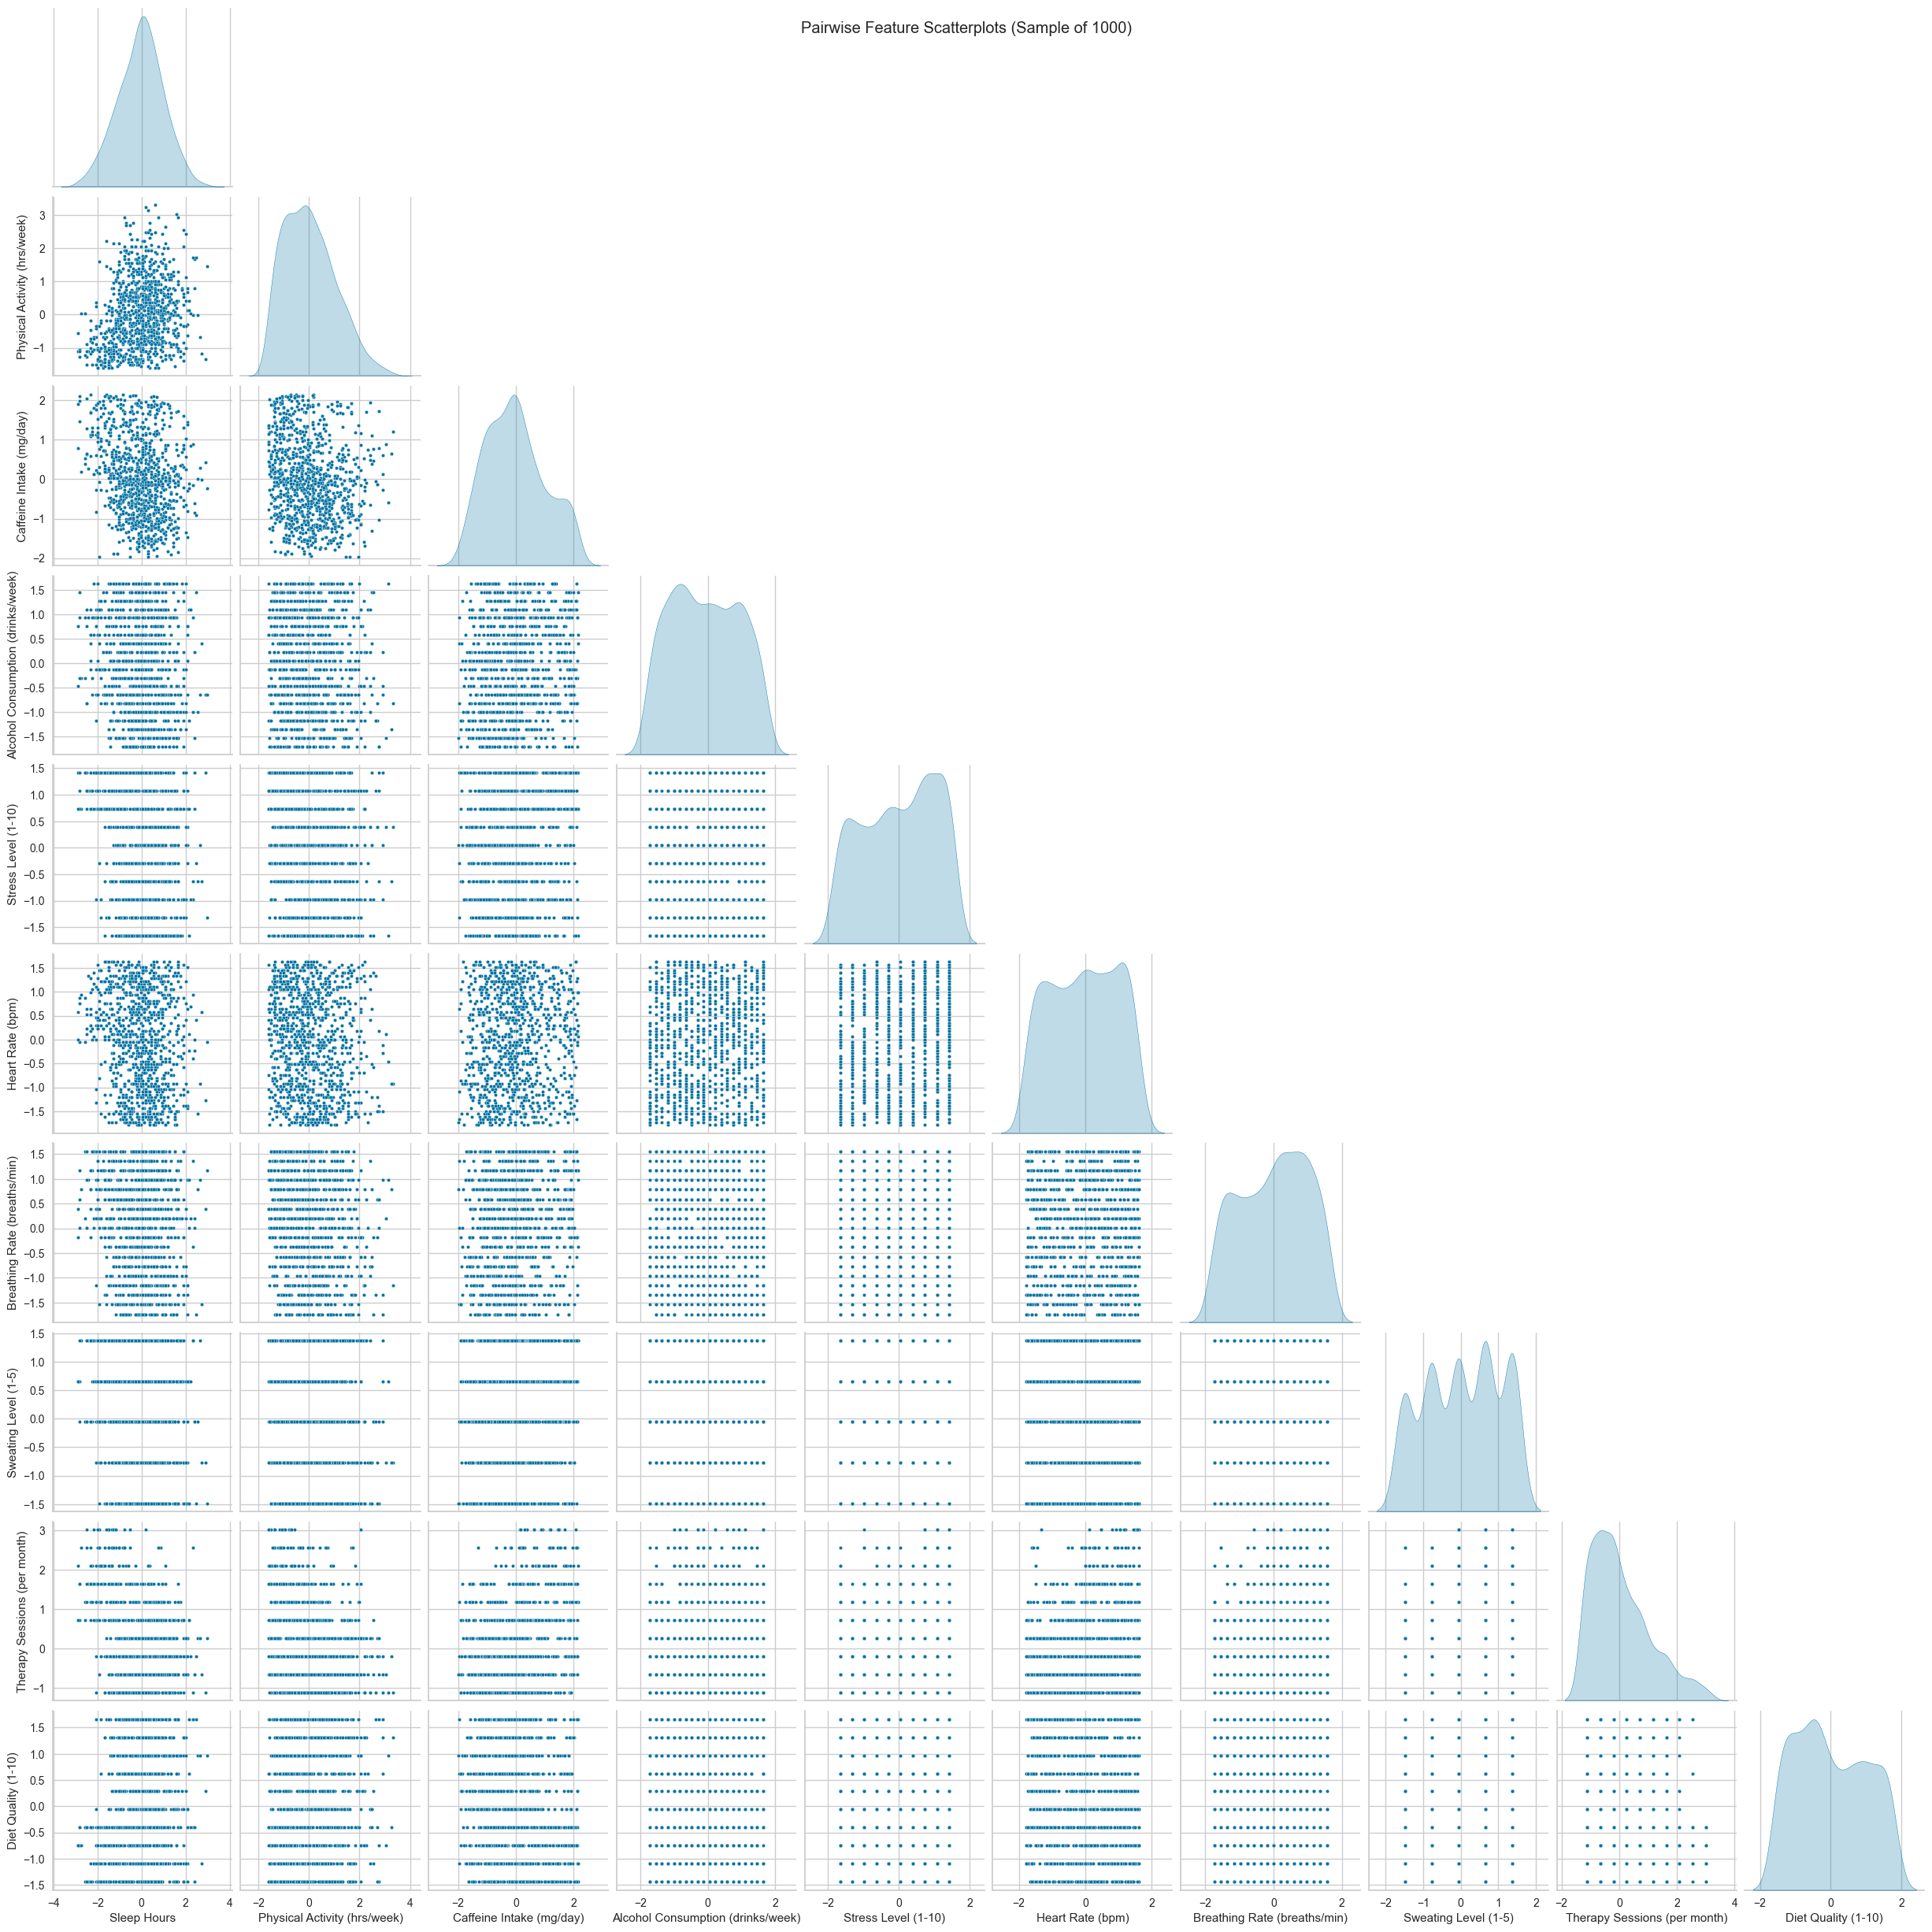

In [13]:
#Sample 1000 points for visualization
sampled_data = data.sample(1000, random_state=42)

#Plot pairwise scatterplots
sns.pairplot(sampled_data, corner=True, diag_kind="kde", plot_kws={"s": 10})
plt.suptitle('Pairwise Feature Scatterplots (Sample of 1000)')
plt.show()

* To improve visualization, 1000 random samples were selected from the dataset.
* The resulting pairplot reveals that most feature pairs  show weak or no clear linear relationships. 
* Horizontal and vertical line patterns are visible in several scatterplots, caused by the discrete nature of many features (e.g., Stress Level measured on a 1–10 scale).
* The features follow a mix of distributions, with some skewed and others roughly symmetric.
* Overall, the scatterplots suggest a high degree of independence between features, which may limit PCA and clustering later.

## EDA Highlight 2

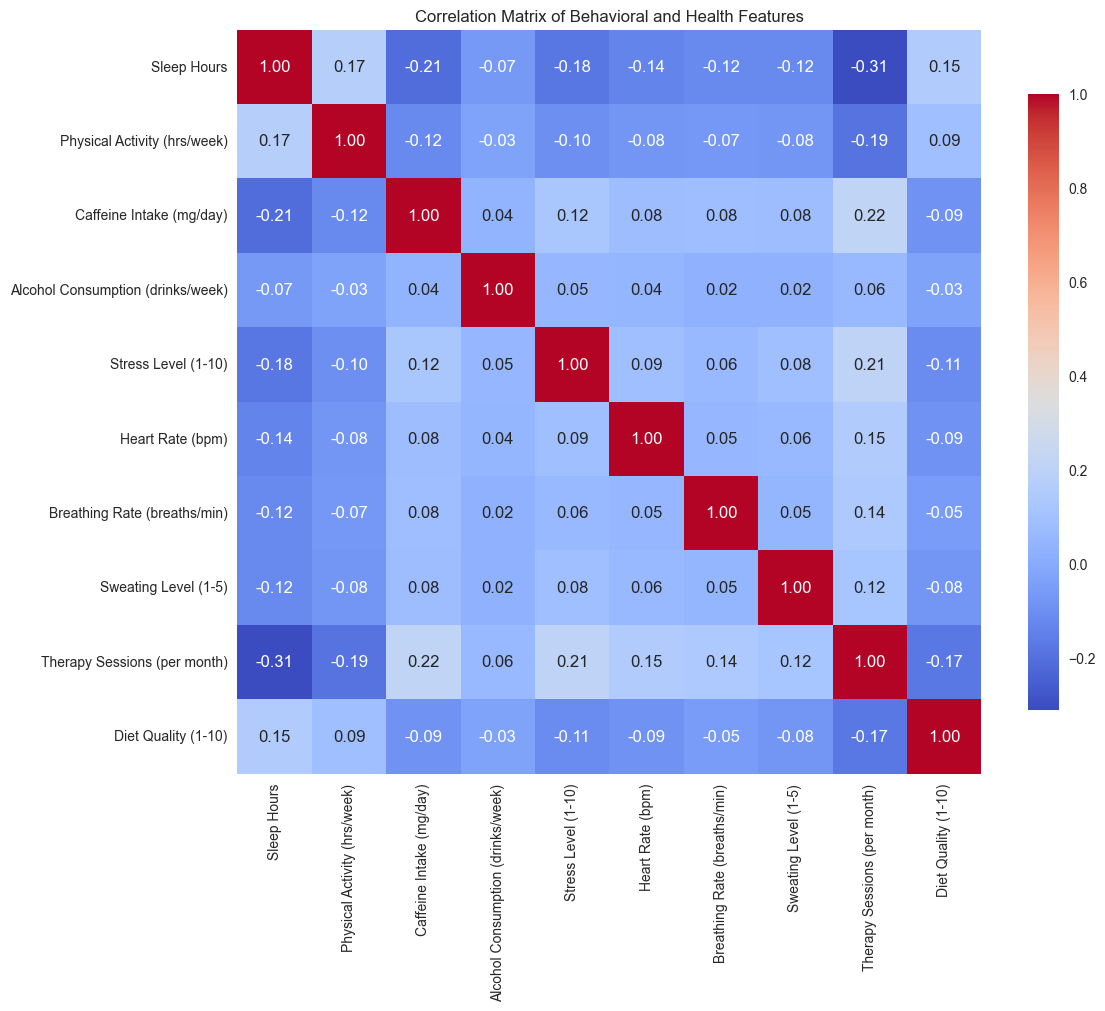

In [14]:
#calculate the Pearson correlation matrix for all features
corr_matrix = data.corr()

#create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    annot=True,       
    fmt=".2f",         
    cmap="coolwarm",  
    square=True,      
    cbar_kws={"shrink": .8}
)
plt.title('Correlation Matrix of Behavioral and Health Features')
plt.show()


* Highest correlations between: 
    * Therapy Sessions and Sleep Hours: r = -.31
    * Sleep Hours and Caffeine Intake: r = -.21
    * Therapy Sessions and Physical Activity: r = -.19
* The correlation matrix shows that all Pearson correlation coefficients are below 0.31, indicating only weak linear relationships between features and confirming the conclusions of EDA1.
* Even feature pairs where moderate associations might be expected (e.g., Stress Level and Heart Rate) do not exhibit strong correlations.
* This overall independence suggests that PCA may not uncover dominant components explaining large variance, and clustering may be more challenging due to the lack of natural group structure.


## EDA Highlight 3

In [ ]:
#numercial features BEFORE standardization
data_unscaled = raw_data[[
    'Sleep Hours',
    'Physical Activity (hrs/week)',
    'Caffeine Intake (mg/day)',
    'Alcohol Consumption (drinks/week)',
    'Stress Level (1-10)',
    'Heart Rate (bpm)',
    'Breathing Rate (breaths/min)',
    'Sweating Level (1-5)',
    'Therapy Sessions (per month)',
    'Diet Quality (1-10)'
]].copy()


,Unscaled Variance,Scaled Variance
Caffeine Intake (mg/day),20970.85,1.0
Heart Rate (bpm),300.18,1.0
Alcohol Consumption (drinks/week),32.37,1.0
Breathing Rate (breaths/min),26.63,1.0
Stress Level (1-10),8.57,1.0
Diet Quality (1-10),8.38,1.0
Therapy Sessions (per month),4.77,1.0
Physical Activity (hrs/week),3.34,1.0
Sweating Level (1-5),1.96,1.0
Sleep Hours,1.51,1.0


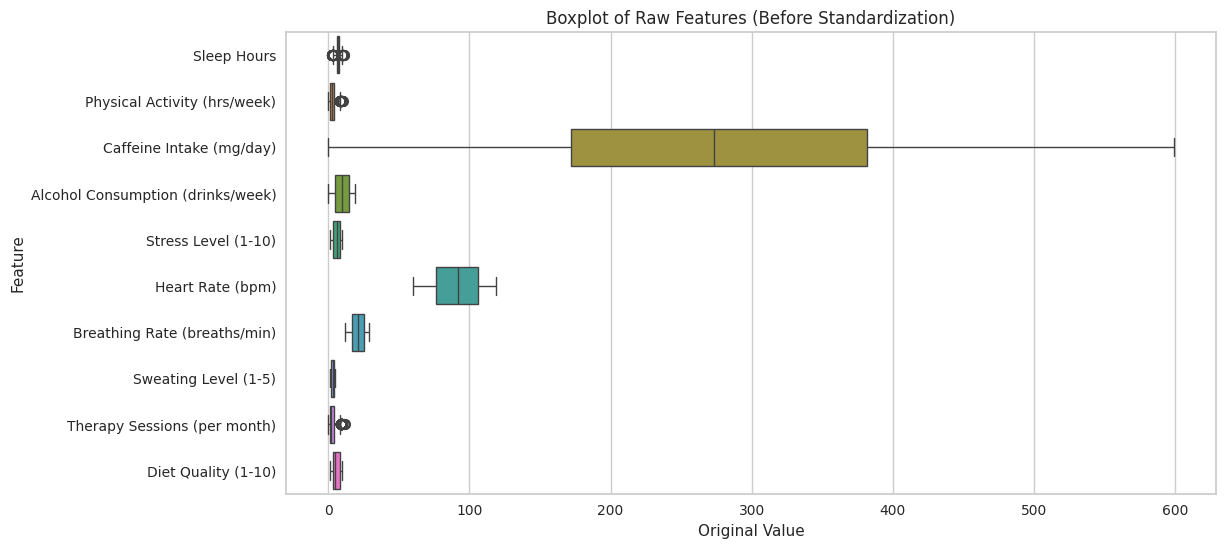

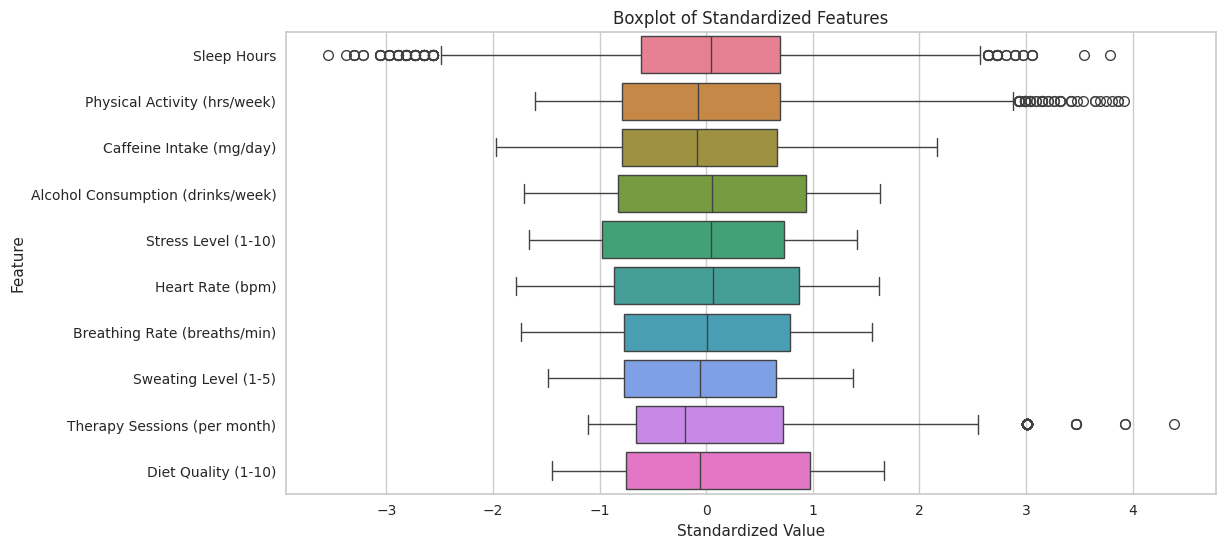

In [46]:
#compare variance before and after scaling
var_before = data_unscaled.var()
var_after = data.var()

#combine into one table
var_comp = pd.DataFrame({
    "Unscaled Variance": var_before,
    "Scaled Variance": var_after
}).round(2)

#sort by unscaled variance
var_comp = var_comp.sort_values("Unscaled Variance", ascending=False)

display(var_comp)

#Boxplot before standardization
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_unscaled, orient='h')
plt.title("Boxplot of Raw Features (Before Standardization)")
plt.xlabel("Original Value")
plt.ylabel("Feature")
plt.show()

#Boxplot after standardization
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient='h')
plt.title("Boxplot of Standardized Features")
plt.xlabel("Standardized Value")
plt.ylabel("Feature")
plt.show()

* The boxplot of the unscaled features reveals:
  * Substantial differences in scale and spread. "Caffeine Intake (mg/day)" shows the widest range, with values exceeding 600 mg/day and frequent outliers.
  * Features like "Sleep Hours", "Therapy Sessions", and "Physical Activity" have narrower spreads but still include visible outliers.
  * Ordinal features such as "Stress Level (1–10)", "Sweating Level (1–5)", and "Diet Quality (1–10)" appear tightly clustered, reflecting their bounded and discrete nature.
  * These differences in spread are due to the original measurement units.

* After standardization, the boxplot shows that:
  * All features are centered around zero and exhibit similar spread.
  * Variance across features is now approximately 1, confirming that scaling was successful.
  * Outliers remain in some variables (e.g., "Alcohol Consumption") but are now shown on a standardized scale.

* The variance table confirms these findings:
  * Before scaling, "Caffeine Intake" had the highest variance (~20,971), followed by "Heart Rate" (~300) and "Alcohol Consumption" (~32).
  * In contrast, "Sweating Level" (~1.96) and "Sleep Hours" (~1.51) showed the least variance.
  * This wide variance range would cause high-scale features to dominate distance and variance-based methods.

* This comparison highlights the necessity of standardization:
  * Without it, high-variance features would overpower PCA and clustering results.
  * Scaling ensures that all features contribute equally, enabling more meaningful and interpretable analysis in the next tasks.

# Task 5 -- Dimensionality Reduction

<div class="alert alert-block alert-warning"> 
<b>PCA</b>: 
Conduct your analyses and transformations according to Task 5.
Call the transformed dataset "data_pca".

(Commented code + bullet points, add cells below)
</div>

After observing correlations between several features in the previous exploratory analyses, I applied Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. The goal was to eliminate redundancy, simplify the feature space, and make the clustering results more robust and interpretable. To do this, I first analyzed the explained variance to decide how many components to retain. Based on this, I performed the final PCA transformation and stored the result in (`data_pca`) for the clustering experiments that follow.

## Covariance of standarized data before PCA

In [18]:
#Data is already standardized 
#Check the covariance matrix of the standardized data before PCA
data.cov().round(2)

,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10)
Sleep Hours,1.00,0.17,-0.21,-0.07,-0.18,-0.14,-0.12,-0.12,-0.31,0.15
Physical Activity (hrs/week),0.17,1.00,-0.12,-0.03,-0.10,-0.08,-0.07,-0.08,-0.19,0.09
Caffeine Intake (mg/day),-0.21,-0.12,1.00,0.04,0.12,0.08,0.08,0.08,0.22,-0.09
Alcohol Consumption (drinks/week),-0.07,-0.03,0.04,1.00,0.05,0.04,0.02,0.02,0.06,-0.03
Stress Level (1-10),-0.18,-0.10,0.12,0.05,1.00,0.09,0.06,0.08,0.21,-0.11
Heart Rate (bpm),-0.14,-0.08,0.08,0.04,0.09,1.00,0.05,0.06,0.15,-0.09
Breathing Rate (breaths/min),-0.12,-0.07,0.08,0.02,0.06,0.05,1.00,0.05,0.14,-0.05
Sweating Level (1-5),-0.12,-0.08,0.08,0.02,0.08,0.06,0.05,1.00,0.12,-0.08
Therapy Sessions (per month),-0.31,-0.19,0.22,0.06,0.21,0.15,0.14,0.12,1.00,-0.17
Diet Quality (1-10),0.15,0.09,-0.09,-0.03,-0.11,-0.09,-0.05,-0.08,-0.17,1.00


* Variances all set to 1 (standardization worked).
* Features are still correlated with each other.
* As they are correlated (even if weakly) they can be reduced to a smaller dimension. 

## First PCA model

In [19]:
#fit PCA to standardized dataset
pca_model=PCA() 
pca_transformed=pca_model.fit_transform(data)

#store results as df
data_pca=pd.DataFrame(pca_transformed, index=data.index)

#display new components and loadings for the first 5 rows
data_pca.head(5).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.64,0.66,-1.60,-0.31,0.16,1.13,0.64,1.36,-0.47,-0.17
1,-1.97,-0.41,1.32,0.40,-0.25,-0.61,0.37,-0.87,-1.70,0.07
2,-0.20,-1.16,0.35,0.41,1.74,-1.11,-1.27,-0.94,-1.28,-1.19
3,-0.15,-0.64,-0.94,-0.54,-0.26,-0.67,-0.61,-1.20,0.11,-1.28
4,-1.14,-0.94,-0.97,0.35,0.81,0.38,-1.17,-1.07,0.77,0.34


In [20]:
#check covariance matrix of principal components
display(data_pca.cov().round(2))

,0,1,2,3,4,5,6,7,8,9
0,2.05,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00
1,-0.00,0.99,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
2,0.00,-0.00,0.96,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00
3,0.00,-0.00,-0.00,0.94,0.00,-0.00,0.00,-0.00,0.00,0.00
4,-0.00,0.00,0.00,0.00,0.93,0.00,0.00,0.00,0.00,-0.00
5,0.00,-0.00,-0.00,-0.00,0.00,0.91,-0.00,-0.00,0.00,0.00
6,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.89,-0.00,-0.00,0.00
7,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.87,-0.00,-0.00
8,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.77,0.00
9,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.68


* PCA was applied to the standardized dataset to extract uncorrelated components that capture the main variance directions in the data.
* The principal components are stored in the variable `data_pca` and represent a rotated version of the original features.
* The covariance matrix of `data_pca` confirms that the components are uncorrelated, as off-diagonal values are near zero.

Explained variance: [0.205 0.099 0.096 0.094 0.093 0.091 0.089 0.087 0.077 0.068]
Cumulative variance: [0.205 0.304 0.4   0.494 0.588 0.679 0.768 0.855 0.932 1.   ]


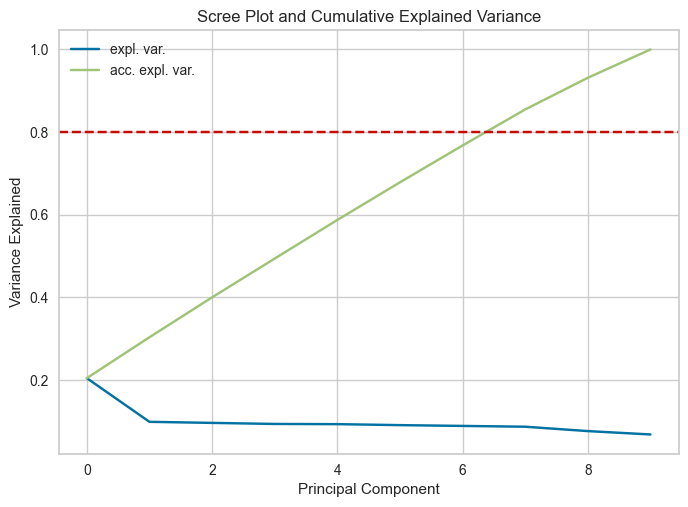

In [21]:
#visualize explained and cumulative variance

#extract explained variance
expl_var=pca_model.explained_variance_ratio_

#plot expl. and cum. variance
plt.plot(expl_var, label='expl. var.')
plt.plot(np.add.accumulate(expl_var), label='acc. expl. var.')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot and Cumulative Explained Variance')
plt.legend()

#print expl. and cum. variance
print("Explained variance:", expl_var.round(3))
print("Cumulative variance:", np.add.accumulate(expl_var).round(3))

* The printed values of `expl_var` show how much variance each component individually explains.
* The printed cumulative values (`np.add.accumulate(expl_var)`) show how much variance is captured by adding components.
* Although the scree plot shows an "elbow" after the first principal component, PC1 alone explains only approximately 20% of the total variance. 
* Therefore, more components are needed to preserve sufficient information. 
* Based on the cumulative explained variance, 8 principal components were selected to capture at least 80% of the total variance.


## Second and final PCA model

In [22]:
#fit final PCA model keeping enough components to explain at least 80% of variance
model = pca(n_components=0.8)
pca_result = model.fit_transform(data)

#store the principal components as a new DataFrame
data_pca = pca_result['PC']

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [80.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [8] that covers the [80.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


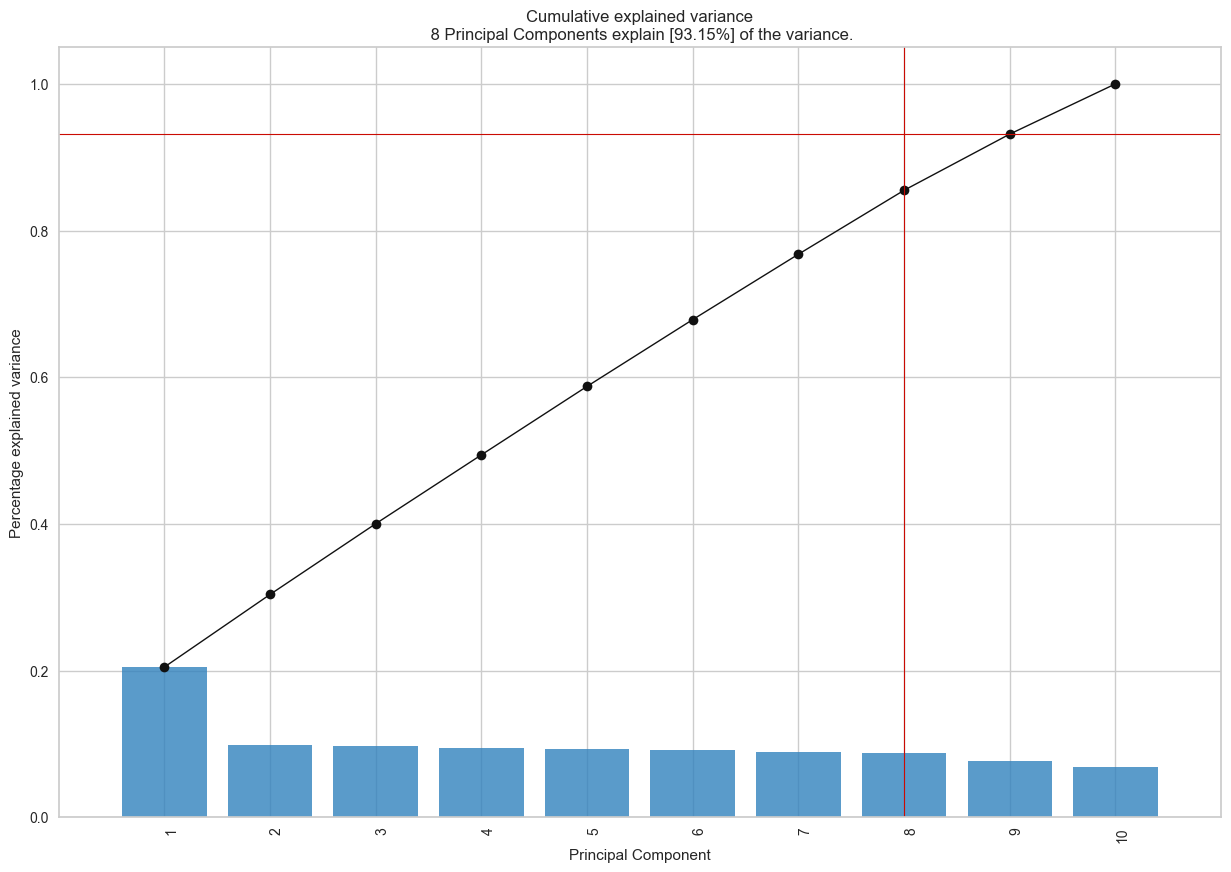

In [23]:
#plot cumulative explained variance
fig, ax = model.plot()

* Applied the final PCA transformation using the number of components needed to retain at least 80% of the original information.
* Reduced the complexity of the data while keeping the most important patterns.
* Created a simplified version of the dataset (data_pca) for the upcoming clustering analysis.
* Confirmed that the retained components capture most of the variance through a visual check.

[15-05-2025 15:33:48] [scatterd.scatterd] [INFO] Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


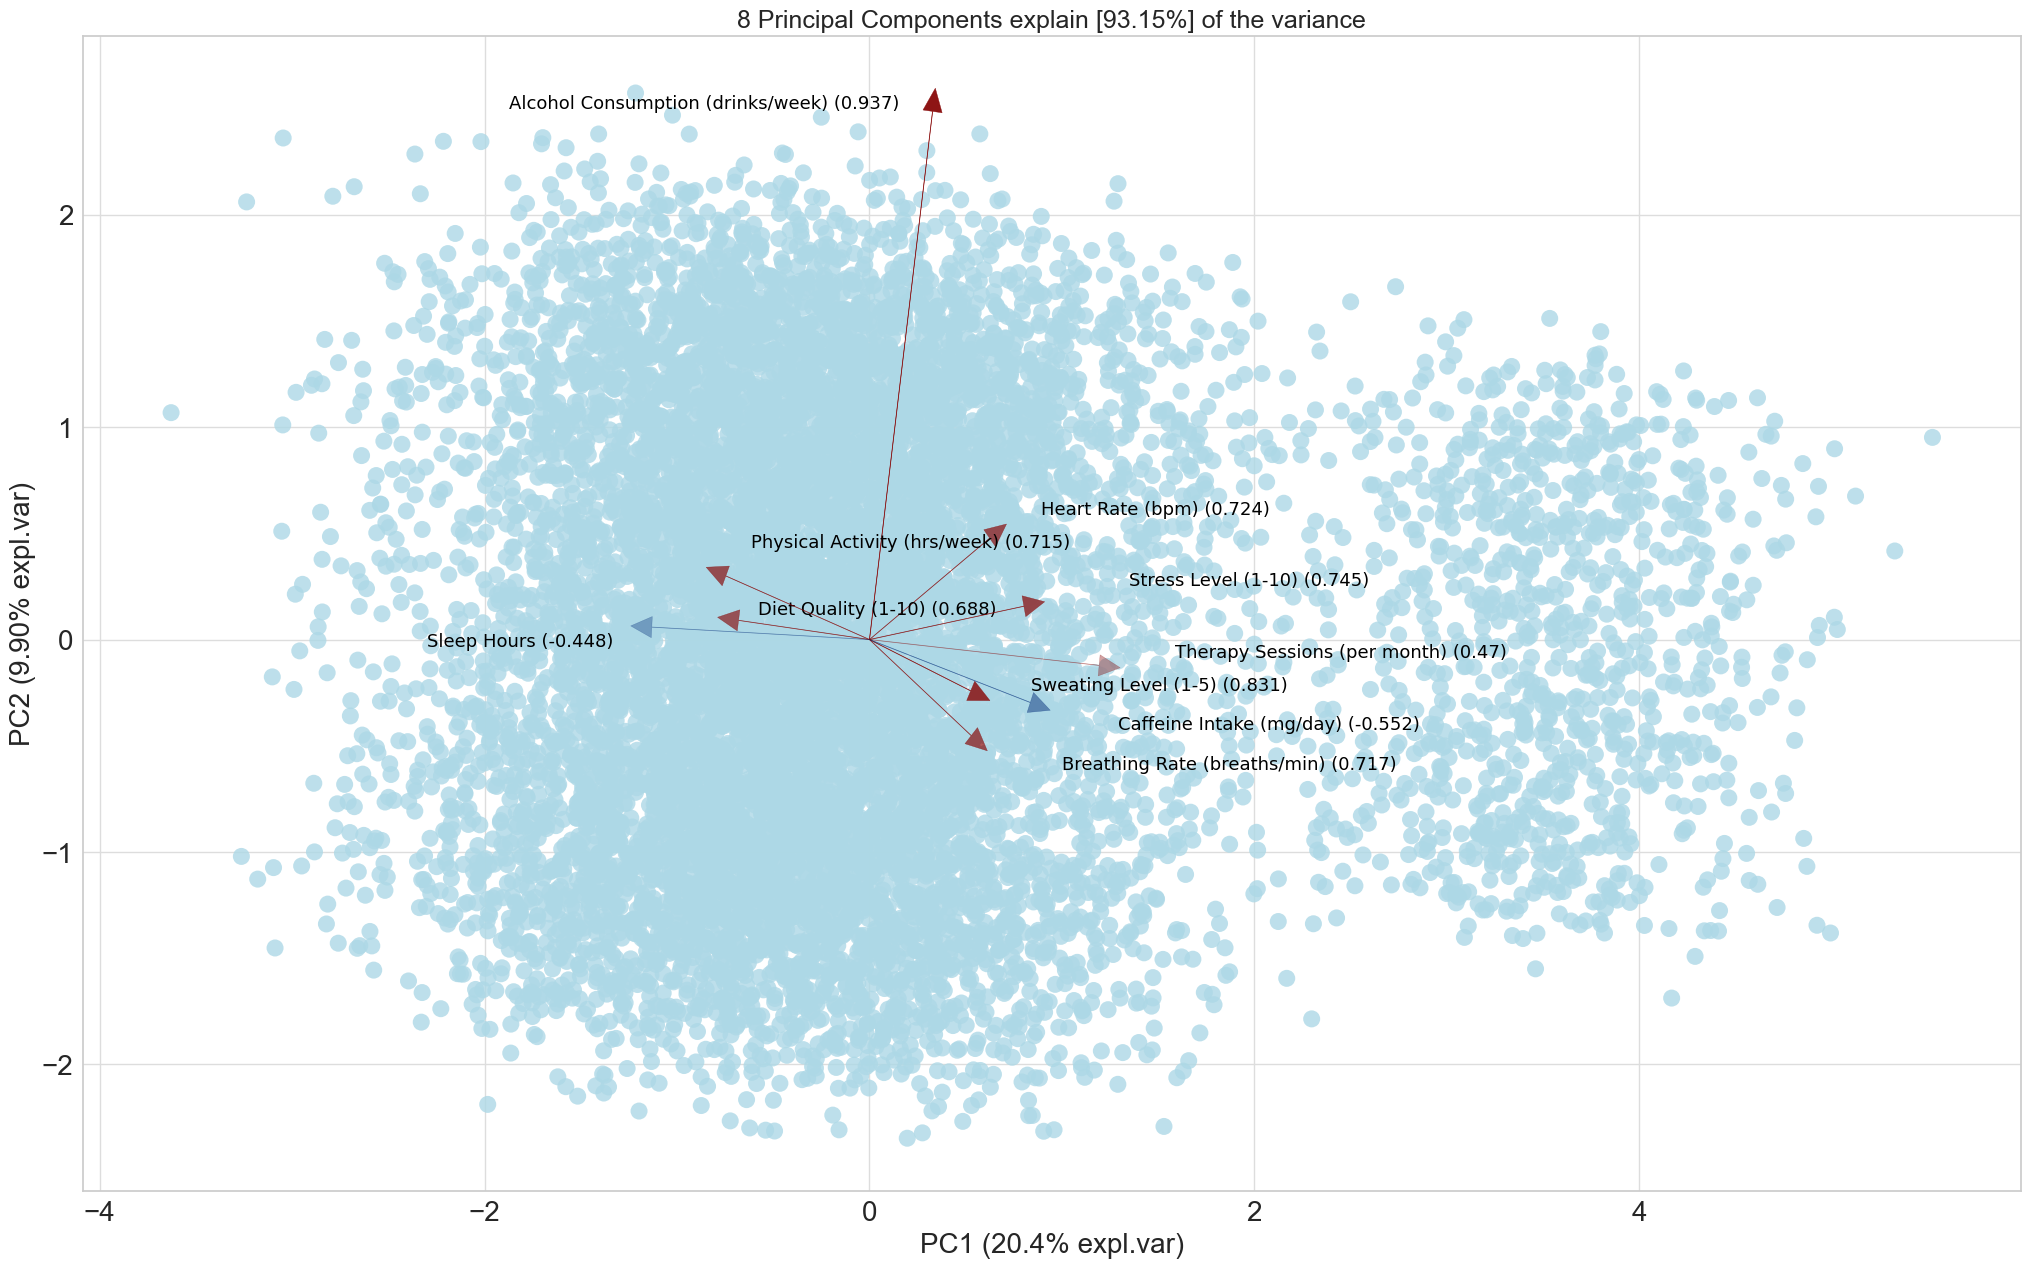

In [24]:
#Biplot showing both data points and feature loadings
fig, ax = model.biplot(n_feat=10, legend=False)

#Style adjustments for better readability
for collection in ax.collections:
    collection.set_facecolor('lightblue')
    collection.set_edgecolor('none')

for text in ax.texts:
    text.set_fontsize(13)        
    text.set_color('black') 

plt.show()

* A biplot was created based on the first two principal components, visualizing both the PCA-transformed data points and the feature loadings.
* Data points were colored light blue for clarity, and feature labels were set to black with increased font size to improve readability.
* Arrows represent the contribution (loadings) of original features onto the principal components.
* Longer arrows indicate features that contribute more strongly to the principal components, such as Alcohol Consumption and Therapy Sessions.
* The direction of each arrow shows how the feature aligns with the principal component axes.
* Features pointing in similar directions are positively correlated (e.g., Heart Rate and Stress Level), while features pointing in opposite directions are negatively correlated in the PCA space (e.g., Physical Activity and Caffeine Intake).

# Task 6 -- Clustering

After reducing the dimensionality of the dataset using PCA, I proceeded with clustering to uncover meaningful subgroups within the data. The simplified feature space from PCA helped reduce noise and made it easier to detect underlying patterns. To explore different perspectives on the clustering structure, I applied k-Means++ clusterin. I ran several experiments with different parameter settings on both the original and the PCA-transformed data to evaluate how well each method captured the group structure relevant to the project goals.

<div class="alert alert-block alert-warning"> 
<b>Choice of Algorithm</b>: 
Given the situation in the pitch and the results from the above analyses. Which algorithm (chosen from those discussed in the lectures) would YOU choose for the clustering? Explain!
    
(Choice + 1-3 bullet points in the cell below)
</div>

My Choice: OPTICS

* The dataset likely contains behavioral subgroups of varying densities and sizes, which OPTICS can detect without assuming a fixed number of clusters.
* OPTICS handles noise and overlapping clusters better than k-means or HAC, which is important given the weak pairwise correlations and low structure in the data.
* As shown in the PCA and EDA steps, there is no strong global structure, so a density-based method is more appropriate than centroid- or hierarchy-based alternatives.

<div class="alert alert-block alert-danger"> 
<b>Requirements</b>: 
In the following and for the remainder of the final phase of the exam (indenpendent of what your choice above suggests), use 

* a clustering algorithm $A$ chosen from the family: __k-means/k-means++__
* the evaluation metric $E_1$: __Silhouette Score__
* the evaluation metric $E_2$: __Davies-Bouldin Index__.
</div>

## Comprehensive clustering analysis
<div class="alert alert-block alert-warning"> 
<b>Clustering</b>: 
On both datasets, data and data_pca, under their respective headlines below, conduct comprehensive clustering analyses with algorithm $A$, using the available methodology from the module and specifically $E_1$ and $E_2$. Conduct ALL necessary steps to create the most helpful and meaningful clustering per dataset and discuss its quality. Use appropriate diagrams to demonstrate the results. 

(Commented code + bullet points, add cells)
</div>

### Clustering Analysis of plain data

In [25]:
#run kmeans++ with different k
silhouette_scores = []
db_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=20,
        random_state=1
    )
    labels = kmeans.fit_predict(data)
    
    #Evaluation metrics
    silhouette_scores.append(silhouette_score(data, labels))
    db_scores.append(davies_bouldin_score(data, labels))

    k  silhouette_score
0   2          0.185834
1   3          0.112748
2   4          0.105976
3   5          0.108170
4   6          0.106758
5   7          0.107444
6   8          0.106026
7   9          0.105633
8  10          0.106371


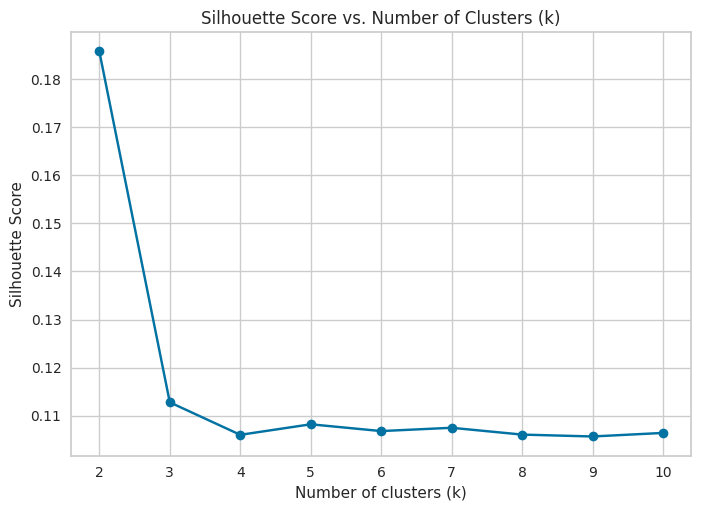

In [26]:
#print silhouette scores
k_sil_scores = pd.DataFrame({
    "k": list(k_range),
    "silhouette_score": silhouette_scores
})

print(k_sil_scores)

#vizualise silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

    k  db_score
0   2  1.525286
1   3  2.622478
2   4  2.502865
3   5  2.435323
4   6  2.304890
5   7  2.211324
6   8  2.135687
7   9  2.105936
8  10  2.043147


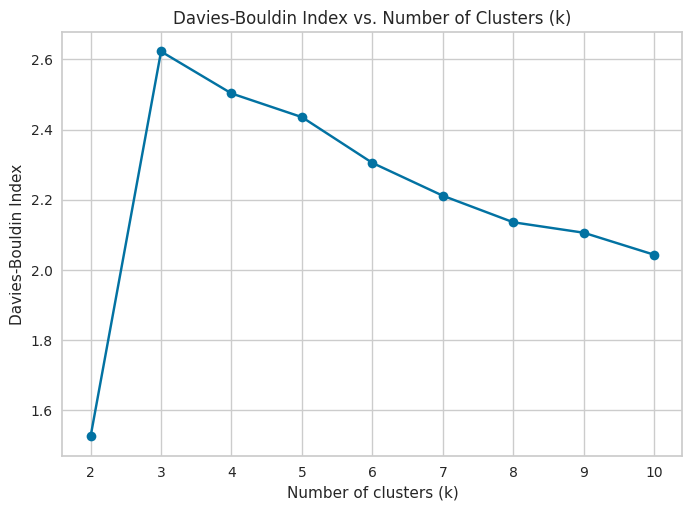

In [27]:
#print db scores
k_db_scores = pd.DataFrame({
    "k": list(k_range),
    "db_score": db_scores
})

print(k_db_scores)

#vizualise db scores
plt.plot(k_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.show()

* Silhouette Score ($E_1$)
    * Measures how well-separated clusters are:
    * Range: -1 to +1
    * rule of thumb:
        * SC > 0.7: strong structure,
        * 0.7 ≥ SC > 0.5: usable structure,
        * 0.5 ≥ SC > 0.25: weak structure,
        * 0.25 ≥ sC: no structure.
    * A score close to 0 suggests overlapping or poorly defined clusters
* Davies-Bouldin Index ($E_2$)
    * Measures average similarity between each cluster and its most similar one
    * Range: 0 to ∞
    * Lower values indicate better partition
    * Values > 1 often indicate weak or overlapping clusters 
 

* k = 2 has the best performance on both metrics:
    * Silhouette Score: 0.186 (highest among tested k)
    * Davies-Bouldin Index: 1.525 (lowest among tested k)
* However, absolute Silhouette is low and absolute DB is exceeding 1 which indicates weak separation.
* Other values of k (3–10) show even worse performance on both metrics.
* The data appears to have limited natural clustering structure under K-Means assumptions.

To check the stability and consistency of the k=2 solution, I also varied the `n_init` parameter. This controls how many times the algorithm runs with different centroid seeds. A higher value increases the chance of avoiding bad local minima and improves clustering robustness.

In [ ]:
#Evaluate stability of k=2 clustering across different n_init values
n_init_range = [1, 5, 10, 20, 50]
silhouette_n_init = []
db_n_init = []

for n in n_init_range:
    kmeans = KMeans(
        n_clusters=2,
        init='k-means++',
        n_init=n,
        random_state=1
    )
    labels = kmeans.fit_predict(data)
    silhouette_n_init.append(silhouette_score(data, labels))
    db_n_init.append(davies_bouldin_score(data, labels))

#Create a small df summary table
pd.DataFrame({
    "n_init": n_init_range,
    "Silhouette Score": silhouette_n_init,
    "Davies-Bouldin Index": db_n_init
})

,n_init,Silhouette Score,Davies-Bouldin Index
0,1,0.185834,1.525286
1,5,0.185834,1.525286
2,10,0.185834,1.525286
3,20,0.185834,1.525286
4,50,0.185834,1.525286


* The evaluation scores remained identical across all tested `n_init` values. 
* This indicates that the k=2 clustering result is highly stable and not sensitive to the random initialization of centroids. 
* The K-Means++ method reliably finds the same solution even with a single run. 
* I therefore proceeded with `n_init=20` for the final model as a robust and standard choice.

In [28]:
#run the final k = 2 model
kmeans_final = KMeans(n_clusters=2, 
                   init='k-means++',
                   n_init=20,
                   random_state=1)
labels_final = kmeans_final.fit_predict(data)

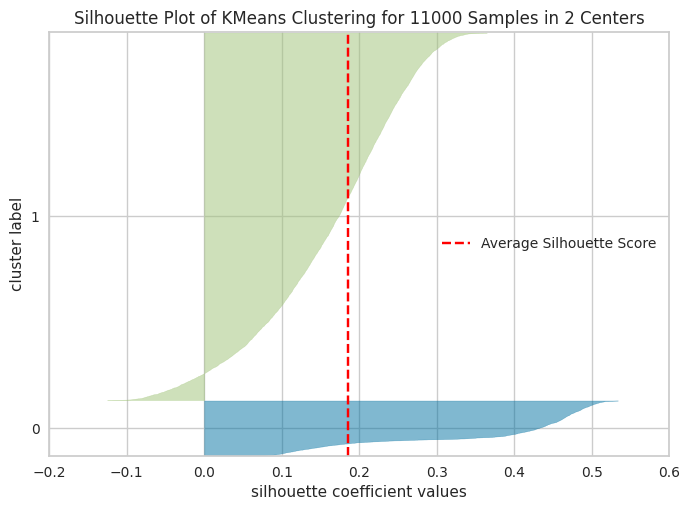

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 11000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
#Silhouette plot from yellowbrick

visualizer = SilhouetteVisualizer(kmeans_final, colors='yellowbrick')
visualizer.fit(data)
visualizer.show()

* The Silhouette Plot confirms numerical evaluation:
    * Cluster 1 (top, green) is larger, but shows low silhouette scores.
    * Many points are near 0 or even negative indicating poor cohesion.
    * Cluster 0 (bottom, blue) has more compact shape.
    * Silhouette values are more consistently positive, some reaching 0.5.
    * This suggests Cluster 0 is more well-defined.
* Red dashed line (avg. Silhouette ~0.19) reflects overall weak separation.
* Conclusion from the plot:
    * The boundary between clusters is fuzzy.
    * Cluster 1 appears to contain ambiguous or scattered observations.
    * This supports the idea that the data contains overlapping variation, rather than two clean groups.

### Clustering Analysis of PCA transformed data

After evaluating K-Means++ on the original data, I repeated the same analysis on the PCA-transformed dataset (`data_pca`). The goal was to examine whether dimensionality reduction improved clustering performance or revealed clearer group structures. Since the PCA transformation simplified the feature space while preserving most of the original variance, I expected potential improvements in separation and interpretability. I again tested different values of k and n_init and evaluated clustering quality using the Silhouette Score and the Davies-Bouldin Index.

In [30]:
#run kmeans++ with different k
silhouette_scores = []
db_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=20,
        random_state=1
    )
    labels = kmeans.fit_predict(data_pca)
    
    #Evaluation metrics
    silhouette_scores.append(silhouette_score(data_pca, labels))
    db_scores.append(davies_bouldin_score(data_pca, labels))

    k  silhouette_score
0   2          0.210492
1   3          0.130532
2   4          0.124101
3   5          0.125815
4   6          0.127065
5   7          0.125629
6   8          0.126780
7   9          0.128107
8  10          0.127902


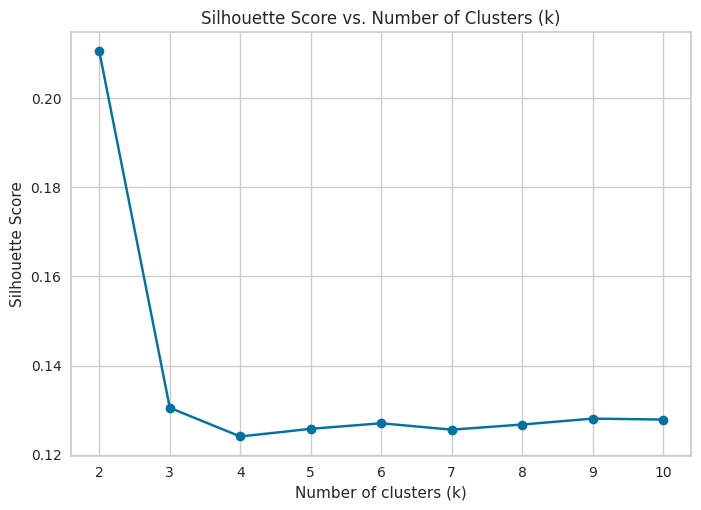

In [31]:
#print silhouette scores
k_sil_scores = pd.DataFrame({
    "k": list(k_range),
    "silhouette_score": silhouette_scores
})

print(k_sil_scores)

#vizualise silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

    k  db_score
0   2  1.396921
1   3  2.366243
2   4  2.261105
3   5  2.206579
4   6  2.037040
5   7  1.937445
6   8  1.884949
7   9  1.849754
8  10  1.868942


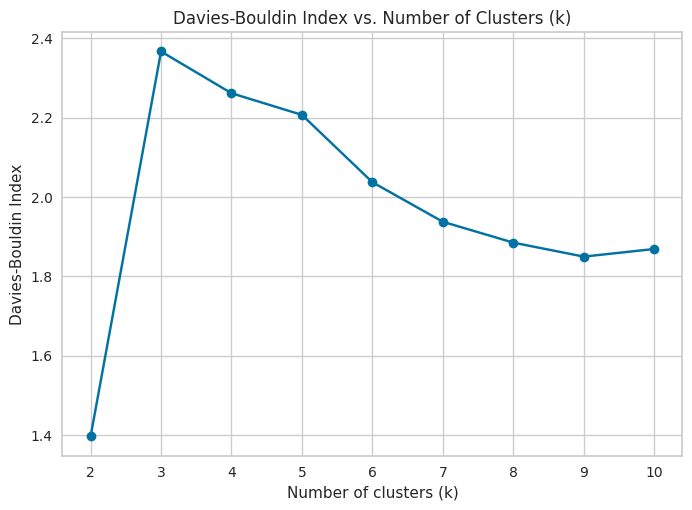

In [32]:
#print db scores
k_db_scores = pd.DataFrame({
    "k": list(k_range),
    "db_score": db_scores
})

print(k_db_scores)

#vizualise db scores
plt.plot(k_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.show()

* Both metrics again agree: k = 2 is the best choice.
* However, absolute values remain low:
    * Silhouette = 0.21 : "no substantial structure" by convention
    * DBI = 1.40: still above 1
* Slight performance improvement on PCA data suggests:
    * Reducing to 8 components removes noise or redundant dimensions.
    * K-Means++ benefits from the compressed representation.
* Conclusion: 
    * Clustering quality is still weak, but marginally improved.
    * likely reflects the underlying nature of behavioral data:
        * Continuous traits (e.g., anxiety, stress)
        * Overlapping behavior patterns, no clear cluster boundaries.
* PCA helped clean up the space but didn't reveal strong new structure.

To evaluate the robustness of the K-Means++ clustering on the PCA-transformed data, I varied the `n_init` parameter. This controls how many times the algorithm runs with different centroid seeds. A higher `n_init` value increases the likelihood of finding a stable and optimal clustering solution. The analysis was conducted with `k=2`, which previously showed the best evaluation scores.

In [48]:
#Evaluate n_init stability for best k (2) on data_pca
n_init_range = [1, 5, 10, 20, 50]
silhouette_n_init_pca = []
db_n_init_pca = []

for n in n_init_range:
    kmeans = KMeans(
        n_clusters=2,
        init='k-means++',
        n_init=n,
        random_state=1
    )
    labels = kmeans.fit_predict(data_pca)
    silhouette_n_init_pca.append(silhouette_score(data_pca, labels))
    db_n_init_pca.append(davies_bouldin_score(data_pca, labels))

#Summary table
pd.DataFrame({
    "n_init": n_init_range,
    "Silhouette Score": silhouette_n_init_pca,
    "Davies-Bouldin Index": db_n_init_pca
})


,n_init,Silhouette Score,Davies-Bouldin Index
0,1,0.209950,1.402639
1,5,0.210207,1.400139
2,10,0.210207,1.400139
3,20,0.210492,1.396921
4,50,0.210492,1.396921


The results showed only minor variations in both the Silhouette Score and the Davies-Bouldin Index across different `n_init` values. Specifically:

* Silhouette Score increased slightly from 0.2100 to 0.2105
* Davies-Bouldin Index decreased from 1.4026 to 1.3969

This confirms that the clustering performance on the PCA-transformed data is stable and not strongly affected by the initialization procedure. I therefore used `n_init=20` as a robust and efficient default for the final model.

In [33]:
#run the final k = 2 model
kmeans_final = KMeans(n_clusters=2, 
                   init='k-means++',
                   n_init=20,
                   random_state=1)
labels_final = kmeans_final.fit_predict(data_pca)

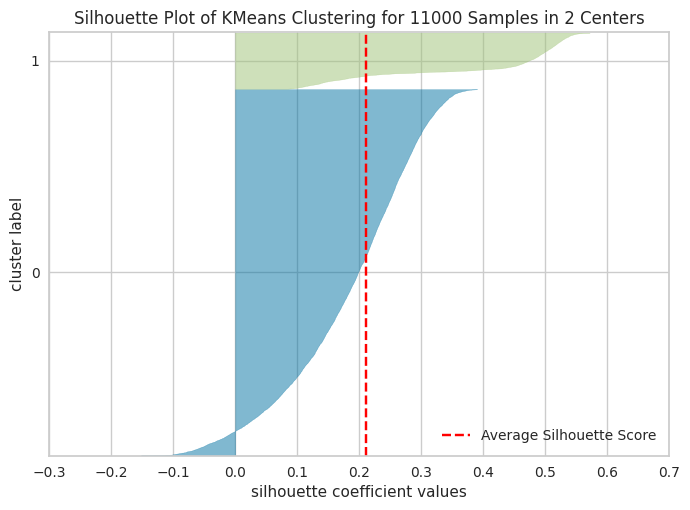

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 11000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
#Silhouette plot from yellowbrick

visualizer = SilhouetteVisualizer(kmeans_final, colors='yellowbrick')
visualizer.fit(data_pca)
visualizer.show()

* similiar interpretation as for silhouette plot for undreduced data
* Average silhouette score ≈ 0.21 : weak but slightly improved structure
* Cluster 1 (green): compact shape, mostly positive values indicating better cohesion
* Cluster 0 (blue): flatter shape, many low or negative scores indicating diffuse and overlapping structure
* Cluster 0 much bigger than cluster 1
* Conclusion: 2 clusters are not well seperated.

In [ ]:
#define a helpfer function to plot clusters in 2D

def plot_pca_clusters_with_centers(kmeans, X_pca, title, colors=['darkorange', 'darkmagenta', 'dodgerblue']):
    '''
    Plot KMeans clusters and centroids for PCA-reduced data (2D).
    Assumes X_pca is already PCA-transformed and has 2 columns (PC1, PC2).
    '''
    plt.figure(figsize=(8, 8))
    cluster_assignments = kmeans.fit_predict(X_pca)

    for i in range(len(np.unique(cluster_assignments))):
        plt.scatter(
            X_pca[cluster_assignments == i].iloc[:, 0],
            X_pca[cluster_assignments == i].iloc[:, 1],
            c=colors[i],
            label=f'Cluster {i}',
            alpha=0.7
        )

    centers = kmeans.cluster_centers_
    plt.scatter(
        centers[:, 0],
        centers[:, 1],
        s=350,
        marker='*',
        c='crimson',
        edgecolor='black',
        label='Centroids'
    )

    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    return cluster_assignments

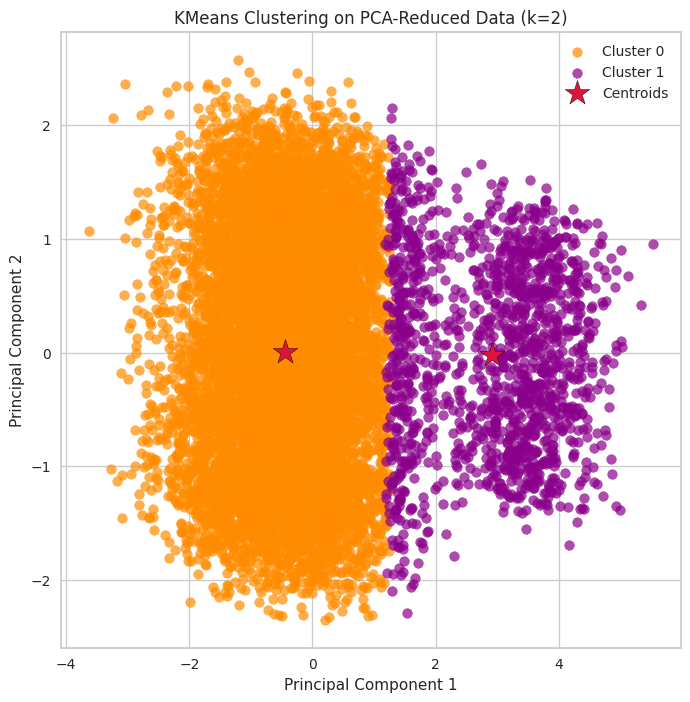

In [ ]:
#use helper function to plot the final k means model in 2D
kmeans_pca = KMeans(n_clusters=2, init='k-means++', n_init=20, random_state=1)
assignments = plot_pca_clusters_with_centers(kmeans_pca, data_pca, title="KMeans Clustering on PCA-Reduced Data (k=2)")

* Plotting datapoints and clusters in a 2D scatterplot of PC1 and PC2 
* Keep in mind: These components account for roughly 30% of the variance.
* Although the plot shows two distinct regions, the overlap between clusters is substantial.
* The decision boundary appears arbitrary, slicing through a high-density transition zone rather than a natural gap. 
* The clustering seems to ignore the underlying data geometry, imposing a split likely driven by KMeans’ assumption of spherical clusters. 
* The result suggests a forced partition rather than a discovery of genuine groupings.
* This supports earlier findings: although k = 2 performs best quantitatively, the real structure is weak and continuous, not discretely clustered.

# Task 7 -- Clustering Comparison

<div class="alert alert-block alert-warning"> 
<b>Comparison</b>: 
Compare both clustering from the previous task as described in Task 7.

(Commented code + bullet points, add cells below)
</div>

 I compared the clustering results obtained from the original data and the PCA-transformed data to assess their structural differences. Specifically, I examined the number of clusters and the evaluation scores from both selected metrics. To provide a transparent overview, I summarized and contrasted the two solutions in a table, highlighting how individual data instances were grouped under each clustering. This comparison helped evaluate whether dimensionality reduction led to a more meaningful or distinct clustering outcome.

| Criterion                     | Clustering on `data`           | Clustering on `data_pca`       |
|------------------------------|----------------------------------|--------------------------------|
| Algorithm (𝐴)                | KMeans++                        | KMeans++                       |
| Number of clusters           | 2                                | 2                              |
| Number of noise points       | n/a (KMeans does not detect noise) | n/a                        |
| Silhouette Score (𝐸₁)        | 0.186                            | **0.210**                      |
| Davies-Bouldin Index (𝐸₂)    | 1.525                            | **1.397**                      |

* Both clusterings were performed using KMeans++ with 2 clusters.
* No noise points were identified, as KMeans does not support noise detection.
* The PCA-based clustering achieved better evaluation scores.
    * It had a higher Silhouette Score (0.210 vs. 0.186), indicating slightly better separation between clusters.
    * It also had a lower Davies-Bouldin Index (1.397 vs. 1.525), suggesting slightly more compact and distinct clusters.
* Overall, the PCA transformation improved clustering quality while preserving the underlying structure.
* Neither clustering reveals a strong or usable structure in the data.

In [37]:
#Cluster Assignments
#On original standardized data
kmeans_data = KMeans(n_clusters=2, init='k-means++', n_init=20, random_state=1)
assignments_data = kmeans_data.fit_predict(data)

#On PCA-reduced data
kmeans_pca = KMeans(n_clusters=2, init='k-means++', n_init=20, random_state=1)
assignments_pca = kmeans_pca.fit_predict(data_pca)


In [38]:
#create a crosstab between cluster assignments of kmeans on original vs. reduced data
pd.crosstab(assignments_data, assignments_pca, 
            rownames=['Original Data Clusters'], 
            colnames=['PCA-Reduced Clusters'], 
            margins=True)

PCA-Reduced Clusters,0,1,All
Original Data Clusters,,,
0,23,1406,1429
1,9514,57,9571
All,9537,1463,11000


* Cluster labels are arbitrary, so we compare by group membership
* After alignment:
    * Data Cluster 1 ≈ PCA Cluster 0 → overlap: 9,514 / 9,537
    * Data Cluster 0 ≈ PCA Cluster 1 → overlap: 1,406 / 1,463
* Only 80 out of 11,000 instances (~0.7%) were assigned differently indicating nearly identical clusterings
* The major structure is preserved across both clusterings, despite feature reduction
* Only a small number of instances (80) switch cluster between the two runs
* PCA transformation appears to retain the dominant behavioral grouping, suggesting robustness of the main cluster
* The small cluster may reflect a distinct behavioral subgroup, and it remains stable under PCA
* Overall, the two clusterings are structurally very similar, with nearly identical group sizes and assignments

# Task 8 -- Conclusions and Future Work

<div class="alert alert-block alert-warning"> 
<b>Subtasks</b>: 
For each subtask, create a fitting headline and add additional code and markdown cells below to conduct the respective task.
    
(Commented code + bullet points, add cells below)
</div>


## Task 8.1 – Final Clustering Choice

After evaluating both clusterings from Task 6, I selected the clustering based on the **PCA-reduced dataset** as the final result.

The following reasons support this decision:

* It achieved slightly better evaluation scores:
  * Silhouette Score: 0.210 (compared to 0.186 on the original data)
  * Davies-Bouldin Index: 1.397 (compared to 1.525 on the original data)
* The structure of the clusters was nearly identical to the original clustering, with over 99 percent of the data points assigned to the same group. This indicates that the structure is robust and preserved under dimensionality reduction.
* PCA likely reduced noise and emphasized the dominant directions of variance in the dataset, leading to more compact and slightly more distinct clusters.
* Although the overall clustering quality remains weak, the PCA-based result represents the best available structure within the scope of this analysis.

In [39]:
#Run KMeans++ with k=2 on PCA-reduced data
kmeans_final = KMeans(n_clusters=2, init='k-means++', n_init=20, random_state=1)
final_labels = kmeans_final.fit_predict(data_pca)

## Task 8.2 - Feature Analysis of the Final Clustering

To interpret the final clustering solution, I analyzed the mean values of all standardized features across the two identified clusters. By examining these group-level patterns, it becomes possible to characterize each cluster in terms of behavioral and physiological indicators. In addition, I performed a validation step using the original anxiety score (which was excluded from the clustering) to assess whether the discovered clusters correspond to meaningful differences in mental health risk.

In [40]:
#Add cluster labels to the standardized feature data
data_with_clusters = data.copy()
data_with_clusters["cluster"] = final_labels

#Compute mean of each feature per cluster
cluster_means = data_with_clusters.groupby("cluster").mean().round(2)

display(cluster_means)

,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10)
cluster,,,,,,,,,,
0,0.21,0.12,-0.15,-0.05,-0.14,-0.11,-0.09,-0.09,-0.23,0.12
1,-1.36,-0.81,1.01,0.33,0.91,0.70,0.61,0.56,1.53,-0.78


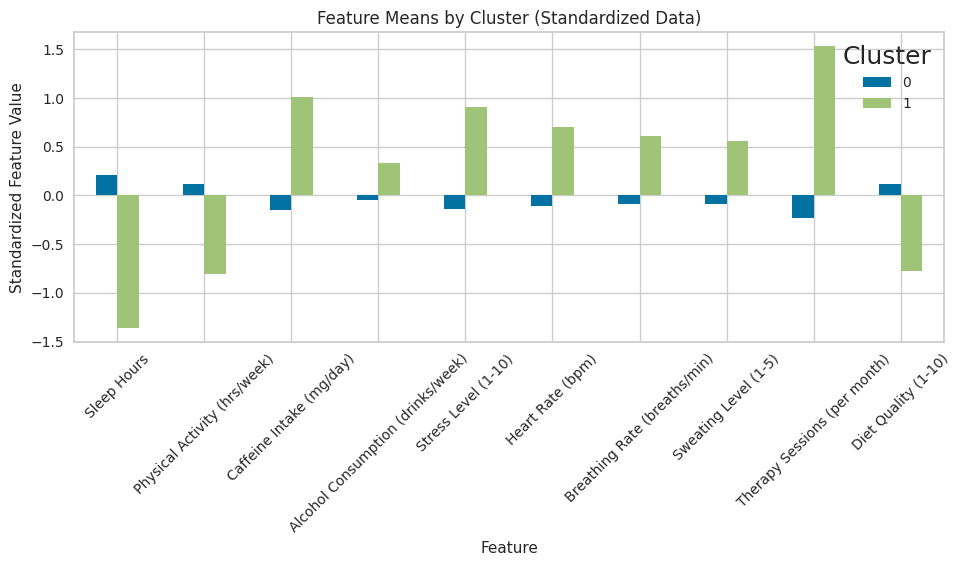

In [41]:
#plot feature means for both clusters
cluster_means.T.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Means by Cluster (Standardized Data)")
plt.ylabel("Standardized Feature Value")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [42]:
#Compare mean anxiety level per cluster (validation only)
cluster_anxiety_means = (
    raw_data[["Anxiety Level (1-10)"]]
    .assign(cluster=final_labels)
    .groupby("cluster")
    .mean()
    .rename(columns={"Anxiety Level (1-10)": "mean_anxiety"})
    .round(2)
)

display(cluster_anxiety_means)

,mean_anxiety
cluster,
0,3.37
1,7.60



The two clusters differ meaningfully across nearly all features.

* **Cluster 0** shows slightly above or near-average values for most positive health indicators:
  * More sleep (+0.21), more physical activity (+0.12), better diet quality (+0.12)
  * Lower than average levels of stress (−0.14), heart rate (−0.11), and breathing rate (−0.09)
  * Less caffeine (−0.15) and alcohol (−0.05) consumption
  * Fewer therapy sessions (−0.23)

* **Cluster 1** is characterized by clear signs of increased physiological and psychological stress:
  * Significantly reduced sleep (−1.36) and physical activity (−0.81)
  * Strongly elevated caffeine intake (+1.01)
  * Higher stress level (+0.91), heart rate (+0.70), and breathing rate (+0.61)
  * Increased sweating level (+0.56), often associated with anxiety or stress responses
  * Much more frequent therapy sessions (+1.53)
  * Poorer diet quality (−0.78)

* These patterns suggest that:
  * **Cluster 1** represents a group experiencing elevated stress and health-related risk factors, potentially corresponding to individuals at greater risk of social anxiety or related difficulties.
  * **Cluster 0** appears to reflect a more typical or lower-risk behavioral profile with relatively balanced health-related behaviors.

* The feature differences are consistent and strong enough to suggest distinct behavioral subgroups, even though the overall cluster separation was weak in terms of structure.

* A validation check using the anxiety level (not included in clustering) confirms this distinction: 
  * Cluster 1 has a much higher mean anxiety score (7.60) compared to Cluster 0 (3.37). 
  * This supports the interpretation that the identified clusters reflect meaningful differences in mental health risk.

## Task 8.3 - Summary of Results and Comparison to the Pitch

The goal of the project was to uncover hidden behavioral profiles in student data that may relate to elevated social anxiety, using PCA and clustering. The original pitch emphasized cost-effectiveness, early risk detection, and actionable group-level insights without requiring new data collection.

The following results were achieved:

* Principal Component Analysis reduced the dataset to 8 components while preserving over 80 percent of the variance. This step helped denoise the data and improved its suitability for clustering.
* Clustering with KMeans++ (k = 2) was applied to both the original and PCA-reduced datasets. The PCA-based clustering yielded slightly better evaluation scores and was selected as the final result.
* Although the clustering structure was weak overall (Silhouette Score = 0.210, Davies-Bouldin Index = 1.397), the clusters themselves displayed distinct behavioral patterns.
* One group showed clear signs of elevated behavioral and physiological stress, including reduced sleep, lower physical activity, higher caffeine intake, and more frequent therapy sessions. The other group reflected more balanced behavior across these dimensions.
* A validation using the self-reported anxiety level, which was not included in the clustering, confirmed this interpretation: Cluster 1 had a substantially higher average anxiety score (7.60) compared to Cluster 0 (3.37). This strengthens the case that the identified behavioral patterns are meaningfully related to mental health risk.

Comparison to the original pitch:

* The project did identify behavioral groups with distinct profiles, though the statistical separation between them was limited.
* The results show that existing behavioral data can be used to explore patterns potentially linked to mental health outcomes, supporting the pitch’s goal of data-driven early detection.
* The entire process was conducted without requiring new data or resource-intensive assessments, demonstrating the feasibility of a fast, low-cost analytical approach.
* While the clusters are not suited for precise segmentation or prediction, they offer a useful starting point for understanding behavioral variation in the student population and prioritizing follow-up efforts.

Limitations:

* The overall clustering structure was weak, indicating that the data may not naturally fall into sharply separated groups, or that KMeans++ was not the most appropriate algorithm for this type of behavioral data.
* The limitations of the clustering approach, including its structural and methodological constraints, will be discussed in detail in Task 8.5.

In summary, the clustering results did not reveal strong structural divisions, but they still exposed meaningful behavioral differences that align with anxiety risk. This provides a valuable, exploratory insight in line with the project's original aims and offers a basis for further development.


## Task 8.4 – Generated Value and Recommendation for the Student Services at FH Kiel & CAU

The findings from this project offer exploratory but actionable insights for Student Services at FH Kiel and CAU. Despite the weak overall clustering structure, the analysis identified two behaviorally distinct groups that differ in ways consistent with elevated stress and anxiety.

Cluster 1 shows signs of increased risk, including reduced sleep, higher physiological stress markers, more therapy sessions, and significantly higher self-reported anxiety. Cluster 0 represents a more stable behavioral profile. These differences are not random and could be leveraged to guide early intervention strategies.

Value for the organization:

* The analysis shows that existing behavioral survey data can reveal patterns relevant to student well-being without requiring additional data collection.
* By identifying a subgroup with stress-related behavioral markers, Student Services can begin to explore targeted support efforts aimed at early prevention.
* The approach is low-cost, scalable, and can be updated as new data becomes available, making it suitable for ongoing use and refinement.
* Even though the clusters are not definitive, the strong feature-level differences and validation against anxiety scores provide a starting point for deeper exploration or pilot programs.

Recommendation:

Student Services could use this initial segmentation as a screening framework to identify students who may benefit from proactive outreach or early interventions. These efforts should remain non-diagnostic and be positioned as supportive, with follow-up assessments handled by professionals.

In parallel, the university could consider refining the behavioral survey, collecting additional indicators (e.g., social support, academic pressure), or integrating external signals (e.g., digital engagement) to strengthen future models. The current results serve as a proof-of-concept that student behavior data can meaningfully inform mental health support strategy.

## 8.5 - Limitations

Several limitations and potential pitfalls should be considered when interpreting the results of this project:

* The clustering structure was weak according to both evaluation metrics, which indicates that the data may not naturally fall into well-separated groups. This limits the reliability of the segmentation.
* The correlations between behavioral features were generally low, with no pair exceeding an absolute value of 0.31. While this reflects the complexity and variability of psychological data, it also suggests that the dataset may have limited internal structure for distance-based clustering methods to detect. This could partially explain the weak cluster separation observed in the analysis.
* KMeans++ assumes spherical clusters and equal variance, which may not match the complexity of behavioral data. More flexible methods may capture structure better.
* Clustering assumes distinct group boundaries, but student behavior may lie on a continuum rather than in discrete categories.
* The clusters were based solely on numerical behavioral features. Important psychosocial or contextual variables (e.g., social support, academic stressors) were not included and may explain variation more effectively.
* The clustering process is sensitive to standardization and dimensionality reduction decisions, and different preprocessing steps could lead to different groupings.
* The project relied on existing data, which may not fully capture the nuances of social anxiety. Behavioral indicators can be indirect or ambiguous.
* The anxiety variable was used only post hoc for validation. While this supported the interpretation, it does not establish causality or predictive power.
* There is a risk that cluster-based approaches may be interpreted too strongly or used for labeling individuals, which is inappropriate given the exploratory nature of the analysis.

Overall, while the project offers a useful starting point, the limitations reinforce that the results should be used for guiding further inquiry, not for individual-level classification or intervention without additional evidence.

## 8.6 - Ideas for Future Work

The following ideas are proposed for future work to build upon the results of this project and address current limitations:

* Apply clustering algorithms that do not assume spherical or equally sized clusters, such as OPTICS or HAC. These methods may better capture the fuzzy, continuous structure observed in the data.
* Given the continuous and overlapping nature of behavioral data, future work should explore the use of OPTICS. 
    * Unlike KMeans++, OPTICS does not assume spherical or equally sized clusters and can adapt to variable-density regions. 
    * It also identifies noise points, which is particularly useful in behavioral datasets where some individuals may not fit cleanly into any group. 
    * This makes OPTICS well-suited for uncovering more nuanced patterns in student behavior and may reveal structure that was missed by centroid-based methods.
* Given the possibility that behavioral patterns form gradual or nested groupings, future work should explore the use of Hierarchical Agglomerative Clustering (HAC).
    * HAC does not assume cluster shape or size and builds a tree-like structure that can reveal hierarchical relationships among behavioral profiles.
    * The dendrogram produced by HAC allows flexible exploration of cluster cutoffs and may uncover subgroups with varying degrees of stress or risk.
    * While it does not handle noise like OPTICS, HAC can be valuable for identifying layered groupings in the student population that are not captured by flat clustering methods.
* Explore non-linear dimensionality reduction techniques (e.g., UMAP or t-SNE) prior to clustering to reveal potentially hidden structures not captured by PCA.
* Incorporate additional behavioral or psychosocial variables, such as social support, academic pressure, or digital activity patterns, which may improve cluster definition and interpretability.
* Use the anxiety score to train a supervised model (e.g., logistic regression, random forest) as a benchmark for how well behavioral features can predict self-reported anxiety levels.
* Reassess clustering stability through resampling or bootstrapping to determine how consistent the clusters are across subsets of students.
* Involve domain experts (e.g., psychologists, counseling staff) in interpreting and validating behavioral groupings to ensure practical relevance and ethical application.

## Task 8.7 – Methodology Discussion

This project followed the methodological requirements defined in the assignment template, including the use of KMeans++ for clustering and two evaluation metrics: Silhouette Score and Davies-Bouldin Index. While this ensured comparability across projects, several limitations and alternatives deserve discussion.

* KMeans++ was chosen as required, but it assumes spherical clusters of equal size and density. These assumptions do not align well with the nature of behavioral data, which is likely to vary continuously and unevenly across individuals.
* The evaluation relied solely on Silhouette Score and Davies-Bouldin Index. While these are widely used, incorporating additional metrics such as the Calinski-Harabasz Index could have provided a more comprehensive assessment of clustering quality from different perspectives.
* PCA was used to reduce dimensionality prior to clustering. While it improved evaluation scores and likely reduced noise, it is a linear method and may not capture complex interactions between features.
* Euclidean distance was used throughout, as is standard with KMeans and PCA. However, cosine distance might have been a better fit for behavioral data, where relative direction of feature patterns (e.g., high stress with low sleep and high caffeine) may be more informative than absolute values. Exploring alternative distance metrics could lead to more conceptually meaningful groupings.
* The pipeline focused solely on unsupervised learning. While this was appropriate for the goal of uncovering hidden patterns, using anxiety scores in supervised setting could yield more targeted models in future work.
* The template did not allow for noise-aware algorithms such as OPTICS or DBSCAN, which might be more suitable for behavioral data. These were explored in the discussion of future work.
* Feature selection was limited to numerical and ordinal data. Including categorical or contextual features (e.g., study program, social support) may improve cluster interpretability.

What could or should have been done differently:

* A clustering method more suitable for behavioral data (such as OPTICS) should have been considered from the start. Unlike KMeans++, it handles noise, supports variable-density clusters, and aligns better with the soft, overlapping structure of psychological traits.
* The choice of distance metric should have been made based on the research goal. Using cosine distance instead of Euclidean could have captured similarity in behavioral patterns rather than absolute values, leading to more meaningful groupings in this context.
* Evaluating the robustness of the clustering (e.g., through bootstrapping) could have helped assess whether the observed groupings were consistent or sensitive to data variation, increasing confidence in their validity.

## Task 8.8 – Reflection

The original pitch aimed to uncover hidden behavioral profiles in student data that could indicate elevated social anxiety. The project emphasized early detection, low-cost implementation, and the use of existing behavioral data to support student mental health services.

In hindsight, many of these goals were well-motivated and appropriate for an exploratory, data-driven analysis. The data was rich, diverse, and suitable for unsupervised methods, and the analysis successfully identified behaviorally distinct subgroups that differed in both lifestyle patterns and self-reported anxiety levels.

However, several aspects of the original pitch were overly optimistic:

* The assumption that meaningful clusters would emerge clearly from behavioral data underestimated the complexity and continuous nature of psychological traits. As the analysis showed, clustering revealed only weak structural separation, despite clear differences in feature means.
* The pitch did not sufficiently anticipate the methodological challenges of applying distance-based clustering to behavioral data, particularly the impact of low feature correlations and the limitations of algorithms like KMeans++.
* The pitch positioned the outcome as actionable and directly applicable to student services. In practice, the results were informative but exploratory in nature and should be used cautiously to inform future inquiry rather than immediate intervention.

What could have been changed at the time of the pitch:

* The project could have been framed more explicitly as an exploratory analysis, with the goal of generating hypotheses rather than producing operational groupings.
* It would have been helpful to acknowledge upfront that behavioral data is often noisy and may not exhibit strong cluster structure.
* Including a plan for validating findings using external information (e.g., anxiety scores, expert review) would have improved the design and interpretation of the results.
* The pitch could have proposed testing multiple clustering algorithms and distance metrics from the start, allowing greater flexibility to adapt the method to the nature of the data.

Despite these challenges, the core idea of leveraging existing behavioral data to identify early risk patterns remains both relevant and promising. This project provided meaningful initial insights while uncovering key limitations that can inform more refined and effective approaches in future work.